## Classifier

In [111]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [112]:
'''
Load CSV
'''
mt1 = pd.read_csv('datasets/meteo_202109-202112.csv')
mt2 = pd.read_csv('datasets/meteo_202201-202212.csv')
mt3 = pd.read_csv('datasets/meteo_202301-202304.csv')

In [113]:
'''
Inspect dataset
'''
print(mt1.columns, mt1.shape)
print(mt2.columns, mt2.shape)
print(mt3.columns, mt3.shape)

Index(['dt', 'dt_iso', 'city_name', 'temp', 'feels_like', 'temp_min',
       'temp_max', 'pressure', 'sea_level', 'grnd_level', 'humidity',
       'wind_speed', 'rain_1h', 'clouds_all', 'weather_description'],
      dtype='object') (2928, 15)
Index(['dt', 'dt_iso', 'city_name', 'temp', 'feels_like', 'temp_min',
       'temp_max', 'pressure', 'sea_level', 'grnd_level', 'humidity',
       'wind_speed', 'rain_1h', 'clouds_all', 'weather_description'],
      dtype='object') (8760, 15)
Index(['dt', 'dt_iso', 'city_name', 'temp', 'feels_like', 'temp_min',
       'temp_max', 'pressure', 'sea_level', 'grnd_level', 'humidity',
       'wind_speed', 'rain_1h', 'clouds_all', 'weather_description'],
      dtype='object') (1752, 15)


In [114]:
mt1.describe()

,dt,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all
count,2.928000e+03,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,0.0,0.0,2928.000000,2928.000000,537.000000,2928.000000
mean,1.635723e+09,15.571301,15.165546,14.008275,16.367978,1019.203893,NaN,NaN,78.455943,2.591936,0.846890,53.703552
std,3.043386e+06,4.794614,5.223424,4.678427,4.835628,5.241333,NaN,NaN,14.207337,1.315286,1.069043,40.501986
min,1.630454e+09,2.590000,1.290000,-0.640000,4.040000,997.000000,NaN,NaN,27.000000,0.090000,0.100000,0.000000
25%,1.633089e+09,11.887500,11.477500,10.660000,12.857500,1016.000000,NaN,NaN,69.000000,1.687500,0.210000,7.000000
50%,1.635723e+09,15.470000,15.125000,13.945000,15.720000,1020.000000,NaN,NaN,82.000000,2.330000,0.450000,59.000000
75%,1.638357e+09,18.932500,18.852500,17.320000,19.560000,1023.000000,NaN,NaN,91.000000,3.332500,1.000000,97.000000
max,1.640992e+09,33.370000,32.790000,27.890000,35.340000,1031.000000,NaN,NaN,98.000000,11.100000,7.450000,100.000000


In [115]:
#print(mt1.info())
#print(mt2.info())
print(mt3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   1752 non-null   int64  
 1   dt_iso               1752 non-null   object 
 2   city_name            1752 non-null   object 
 3   temp                 1752 non-null   float64
 4   feels_like           1752 non-null   float64
 5   temp_min             1752 non-null   float64
 6   temp_max             1752 non-null   float64
 7   pressure             1752 non-null   int64  
 8   sea_level            0 non-null      float64
 9   grnd_level           0 non-null      float64
 10  humidity             1752 non-null   int64  
 11  wind_speed           1752 non-null   float64
 12  rain_1h              206 non-null    float64
 13  clouds_all           1752 non-null   int64  
 14  weather_description  1752 non-null   object 
dtypes: float64(8), int64(4), object(3)
mem

In [116]:
'''
checking for duplicated entries
'''
print(mt1.duplicated().sum())
print(mt2.duplicated().sum())
print(mt3.duplicated().sum())

0
0
0


In [117]:
print(mt1.isna().sum())
print(mt2.isna().sum())
print(mt3.isna().sum())

dt                        0
dt_iso                    0
city_name                 0
temp                      0
feels_like                0
temp_min                  0
temp_max                  0
pressure                  0
sea_level              2928
grnd_level             2928
humidity                  0
wind_speed                0
rain_1h                2391
clouds_all                0
weather_description       0
dtype: int64
dt                        0
dt_iso                    0
city_name                 0
temp                      0
feels_like                0
temp_min                  0
temp_max                  0
pressure                  0
sea_level              8760
grnd_level             8760
humidity                  0
wind_speed                0
rain_1h                6862
clouds_all                0
weather_description       0
dtype: int64
dt                        0
dt_iso                    0
city_name                 0
temp                      0
feels_like            

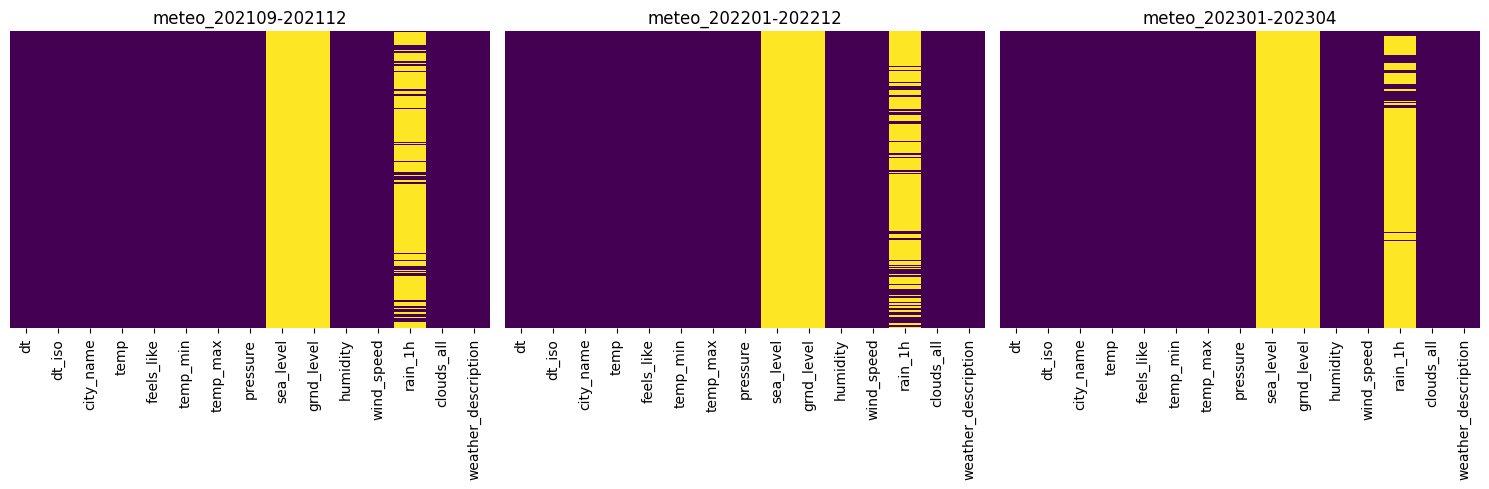

In [118]:
'''
Inspect Missing values dataset
'''
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.heatmap(mt1.isnull(), yticklabels=False, cbar=False, cmap='viridis', ax=axs[0])
axs[0].set_title('meteo_202109-202112')
sns.heatmap(mt2.isnull(), yticklabels=False, cbar=False, cmap='viridis', ax=axs[1])
axs[1].set_title('meteo_202201-202212')
sns.heatmap(mt3.isnull(), yticklabels=False, cbar=False, cmap='viridis', ax=axs[2])
axs[2].set_title('meteo_202301-202304')
plt.tight_layout()

# mais vale apagar as colunas porque não temos forma de descobrir missing values, rain_1h provavelmente também vai ter que ser apagada
mt1.drop('sea_level',axis=1,inplace=True)
mt1.drop('grnd_level',axis=1,inplace=True)
mt2.drop('sea_level',axis=1,inplace=True)
mt2.drop('grnd_level',axis=1,inplace=True)
mt3.drop('sea_level',axis=1,inplace=True)
mt3.drop('grnd_level',axis=1,inplace=True)

In [77]:
#Let's assume a REGRESSION problem! Let's predict the FARE paid by a person 
#(maybe not a very good problem but it serves its purpose)!
#Let's start by creating our X (input data) and our y (target feature - the Survived feature)
x = df.drop(['Fare'], axis=1) #input features - everything except the Survived feature
y = df['Fare'].to_frame() #target feature

KeyError: "['Fare'] not found in axis"

In [65]:
#Let's use the X and Y, which contain 891 rows of data
#to create train and test sets of data.
#Important -> Define the random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=179)

#dropping categorical features from the input data (X_train and X_test)  

X_train = X_train.drop(['Name', 'Sex', 'Age', 'Ticket', 'Cabin', 'Embarked'], axis=1)  
X_test = X_test.drop(['Name', 'Sex', 'Age', 'Ticket', 'Cabin', 'Embarked'], axis=1)    

NameError: name 'X' is not defined

In [43]:
#Create an instance of a Decision Tree regressor
#Again, defining the random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=179)

In [44]:
#Training, i.e., fitting the model (using the training data!!)
clf.fit(X_train, y_train)

ValueError: could not convert string to float: 'Harris, Mr. George'

In [116]:
...

array([ 18.7875,   7.8958,  10.5   ,  27.9   ,  34.375 ,  24.15  ,
       211.5   ,   7.7417,  12.35  ,   7.2292,   7.2292,  52.    ,
        15.5   ,  18.7875,  13.    ,   8.6625,   8.05  ,  52.    ,
         8.6625,  35.5   ,  76.2917,  15.5   ,   7.6292,   8.4042,
         8.6625,   7.125 ,   7.775 ,   7.65  ,  93.5   ,  26.    ,
         7.8792,   8.6625,  39.6875,  16.1   , 113.275 ,  12.35  ,
         7.8958,   7.775 ,  29.7   ,  20.575 ,   7.8958,   7.75  ,
        33.5   ,   7.75  ,   7.8875,   8.1375,  69.55  ,   7.25  ,
        53.1   ,  13.    ,  78.2667,  27.75  ,  26.    ,  14.4542,
         7.25  ,  39.6875,  26.    ,   8.6625,  10.5   , 113.275 ,
        13.    ,  73.5   ,   7.05  ,  17.8   ,  59.4   ,  39.6875,
         8.05  ,  26.25  ,   7.25  ,   7.8958,  26.    ,  18.75  ,
         8.6625,   6.75  ,  46.9   ,  13.    , 113.275 ,   7.775 ,
        15.55  ,  11.2417,  27.    ,   7.2292,   0.    ,   7.225 ,
        69.55  ,   9.8375,  76.2917,  29.    ,  10.5   ,   7.8

In [117]:
...

14.68592556053812

In [118]:
#squared parameter as TRUE for MSE
...

1399.7722041242152

In [119]:
#squared parameter as FALSE for RMSE
...

37.41352969347072

<Axes: >

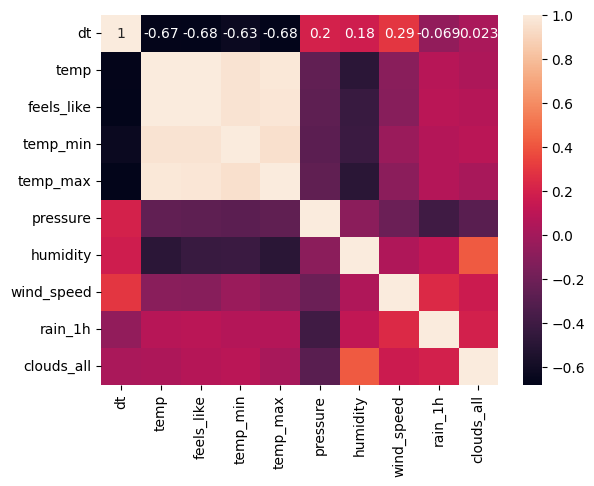

In [68]:
sns.heatmap(mt1.corr(numeric_only=True),annot=True)

HEAD:
 0    1630454400
1    1630458000
2    1630461600
3    1630465200
4    1630468800
Name: dt, dtype: int64

DESCRIPTION:
 count    2.928000e+03
mean     1.635723e+09
std      3.043386e+06
min      1.630454e+09
25%      1.633089e+09
50%      1.635723e+09
75%      1.638357e+09
max      1.640992e+09
Name: dt, dtype: float64

SKEWNESS:
 -1.0174020985648455e-16

KURTOSIS
 -1.2


Text(0, 0.5, 'Frequency')

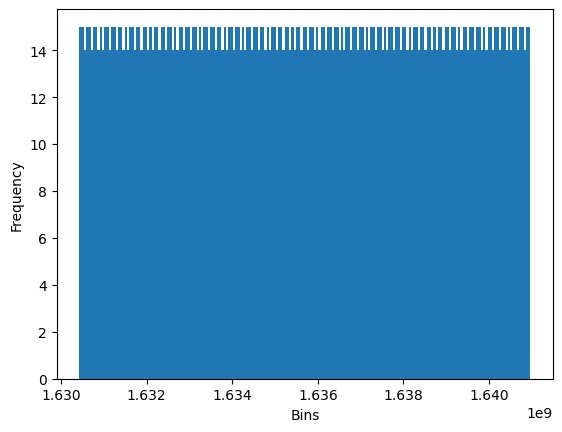

In [142]:
'''
dt - timestamp - analysis
'''
print('HEAD:\n',df['dt'].head())

print('\nDESCRIPTION:\n',df['dt'].describe())


# Skewness is a measure of the asymmetry of a distribution
print('\nSKEWNESS:\n',df['dt'].skew())
# mede o achatamento da curva da distribuição
print('\nKURTOSIS\n',df['dt'].kurt())


num_bins = 200
data = df['dt']
bin_width = (np.max(data) - np.min(data)) / num_bins
bins = np.arange(np.min(data), np.max(data) + bin_width, bin_width)
hist, edges = np.histogram(data, bins=bins)

# Plotting the histogram
plt.bar(edges[:-1], hist, width=bin_width)
plt.xlabel('Bins')
plt.ylabel('Frequency')